<a href="https://colab.research.google.com/github/TalCordova/Hands_on_ML/blob/main/hands_on_ml_chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4 - Training Model

## The Normal Equation

In [1]:
import numpy as np

np.random.seed(42)
m = 100
X = 2 * np.random.randn(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

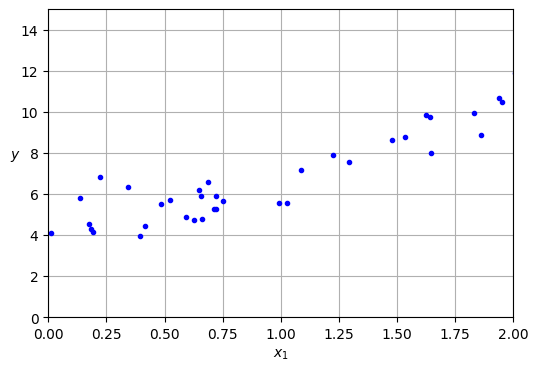

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [3]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [4]:
theta_best

array([[4.00742783],
       [2.92837142]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.00742783],
       [9.86417067]])

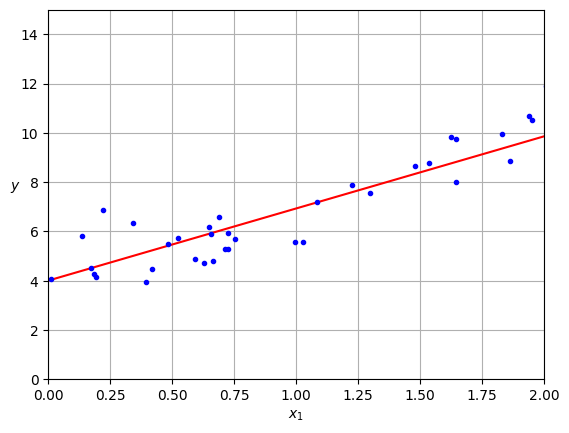

In [6]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, 'r-', label = "Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.00742783]), array([[2.92837142]]))

In [8]:
lin_reg.predict(X_new)

array([[4.00742783],
       [9.86417067]])

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.00742783],
       [2.92837142]])

In [10]:
np.linalg.pinv(X_b) @ y

array([[4.00742783],
       [2.92837142]])

## Batch Gradient Decent

In [11]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2,1)

In [12]:
for epoch in range(n_epochs):
  gradients = 2 / m * X_b.T @ (X_b @ theta - y)
  theta = theta - eta * gradients

In [13]:
theta

array([[4.00742783],
       [2.92837142]])

## Stochastic Gradient Decent

In [14]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2,1)


In [15]:
for epoch in range(n_epochs):
  for iteration in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index + 1]
    yi = y[random_index : random_index + 1]
    gradients = 2 * xi.T @ (xi @ theta - yi)
    eta = learning_schedule(epoch * m + iteration)
    theta = theta - eta * gradients

In [16]:
theta

array([[4.04913598],
       [2.93329854]])

In [17]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-5, penalty = None, eta0 = 0.01, n_iter_no_change = 100, random_state = 42)
sgd_reg.fit(X, y.ravel()) # y.ravel() beacause fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.0080759]), array([2.9297113]))

## Mini-Batch Gradient Descent

That is the middel between batch GD and stochastic GD - it will be trained on a small batch of the data each epoch and not a single or all the data.

## Polynomial Regression

In [19]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.rand(m, 1)

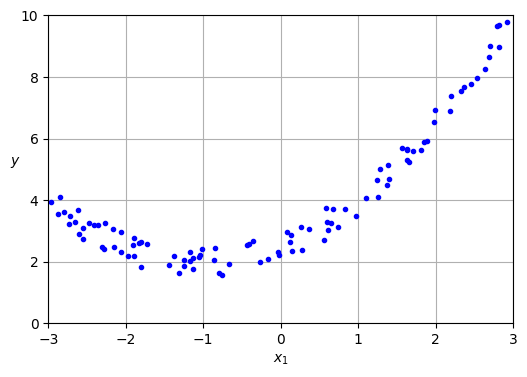

In [20]:
# extra code – this cell generates and saves Figure 4–12
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [22]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.49786712]), array([[0.9943591 , 0.49967213]]))

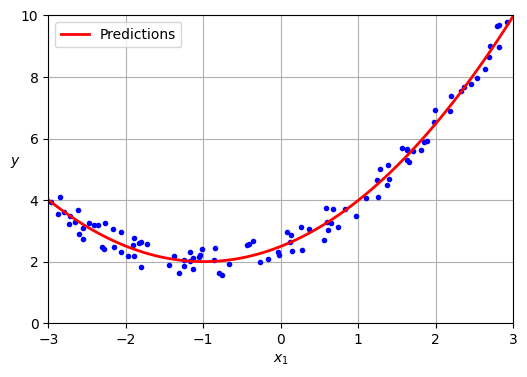

In [24]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

## Learning Curves

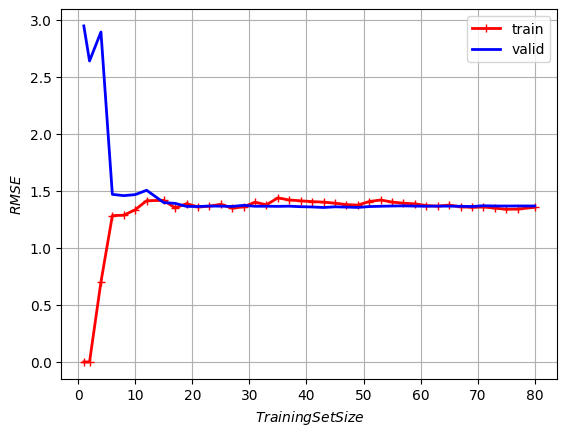

In [25]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes = np.linspace(0.01, 1.0, 40), cv = 5, scoring = "neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis = 1)
valid_errors = -valid_scores.mean(axis = 1)

plt.plot(train_sizes, train_errors, "r-+", linewidth = 2, label = "train")
plt.plot(train_sizes, valid_errors, "b", linewidth = 2, label = "valid")
plt.xlabel("$Training Set Size$")
plt.ylabel("$RMSE$")
plt.legend(loc="upper right")
plt.grid()
plt.show()

In [26]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis = 1)
valid_errors = -valid_scores.mean(axis = 1)

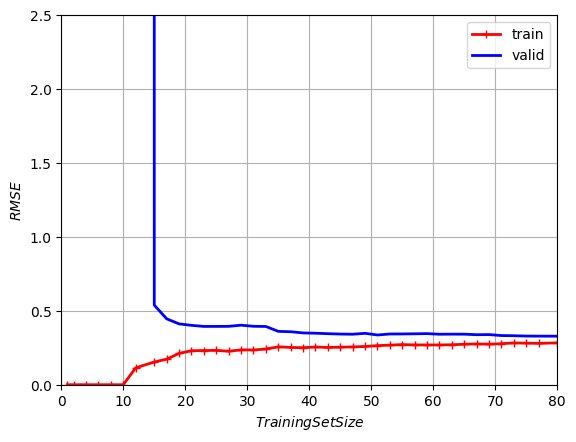

In [27]:
plt.plot(train_sizes, train_errors, "r-+", linewidth = 2, label = "train")
plt.plot(train_sizes, valid_errors, "b", linewidth = 2, label = "valid")
plt.xlabel("$Training Set Size$")
plt.ylabel("$RMSE$")
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])
plt.grid()
plt.show()

## Regularized Linear Models

### Ridge Regression

In [28]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.1, solver = 'cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.44714236]])

### Lasso Regression

In [30]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.3944001])

Another code for the Lasso regression can be:
```
SDGRegressor(penalty = "l1", alpha = 0.1)
```

### Elastic Net Regression

This is the middel ground between Lasso and Ridge regression, with the possibilty to decide the weight of each (using the $r$ parameter).

In [32]:
from sklearn.linear_model import ElasticNet
elastic_reg = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_reg.fit(X,y)
elastic_reg.predict([[1.5]])

array([5.39746654])

## Early Stopping

In [33]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

In [35]:
preprocessing = make_pipeline(PolynomialFeatures(degree = 90, include_bias = False), StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.fit_transform(X_valid)
sgd_reg = SGDRegressor(penalty = None, eta0 = 0.002, random_state = 42)
n_epochs = 500
best_valid_rmse = float('inf')

for epoch in range (n_epochs):
  sgd_reg.partial_fit(X_train_prep, y_train)
  y_valid_predict = sgd_reg.predict(X_valid_prep)
  val_error = mean_squared_error(y_valid, y_valid_predict, squared = False)
  if val_error < best_valid_rmse:
    best_valid_rmse = val_error
    best_model = deepcopy(sgd_reg)

## Logistic Regression

### Estimating Probabilities

$\hat{p} = \sigma(\theta^Tx)$

$\sigma(t) = \frac{1}{1 + exp(-t)}$

The logistic regression will choose the class according to:

$\hat{y} = \begin{cases} 0\space if\space \hat{p}\space <\space 0.5 \\ 1\space if\space \hat{p} >=\space 0.5\end{cases}$

### Decision Boundaries

In [2]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame = True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [5]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [6]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]]
y = iris.target_names[iris.target] == "virginica"
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42) # default is 25% test size

In [13]:
log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


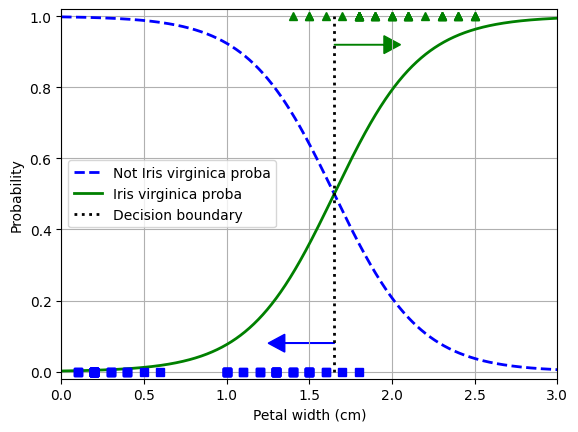

In [17]:
import numpy as np
import matplotlib.pyplot as plt

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:,1] >= 0.5][0, 0]

plt.plot(X_new, y_proba[:, 0], "b--", linewidth = 2, label = "Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth = 2, label = "Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0,1], "k:", linewidth = 2, label = "Decision boundary")

plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()

plt.show()

In [18]:
decision_boundary

1.6516516516516517

In [20]:
log_reg.predict([[1.7], [1.5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True, False])

### Softmax Regression

In [21]:
X = iris.data[["petal length (cm)", "petal width (cm)"]]
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [22]:
softmax_reg = LogisticRegression(C = 30, random_state = 42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [23]:
softmax_reg.predict([[5, 2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [24]:
softmax_reg.predict_proba([[5, 2]]).round(2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.  , 0.04, 0.96]])